In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv('data/orders.csv')

#### Limpieza y creación de columnas útiles en `orders`

In [10]:
orders["billing_address"] = orders["billing_address"].str.upper()
orders.fillna({"billing_address":"UNDEFINED"}, inplace=True)

# Los valores de "billing_address" se caracterizan por tener en alguna parte
# 2 letras mayúsculas seguidas de un espacio y 5 dígitos.
# Interpreto las dos letras mayúsculas como el Estado y los 5 dígitos como el código postal.
pattern = r'([A-Z]{2})\s\d{5}'
orders[["state"]] = orders["billing_address"].str.extract(pattern)

# Chequeo que la extracción haya salido bien
print("Filas totales en dataset orders:", len(orders))
print("Filas con estado no nulos:", orders["state"].notna().sum())
print("Filas con estado nulo:", orders["state"].isna().sum())

null_state_and_null_billing_addr = orders["state"].isna() & orders["billing_address"].str.contains("UNDEFINED")

print("¿Todas las filas que tienen estado nulo, tienen dirección de facturación indefinida?", 
        "Si" if null_state_and_null_billing_addr.sum() == orders["state"].isna().sum() else "No")

orders.fillna({"state":"N/A"}, inplace=True)

Filas totales en dataset orders: 4700000
Filas con estado no nulos: 4277862
Filas con estado nulo: 422138
¿Todas las filas que tienen estado nulo, tienen dirección de facturación indefinida? Si


In [4]:
orders["order_date"] = pd.to_datetime(orders["order_date"], format="%Y-%m-%dT%H:%M:%S.%f", errors="coerce")
orders["date"] = pd.DatetimeIndex(orders["order_date"]).date
orders["year_month"] = pd.DatetimeIndex(orders["order_date"]).strftime('%Y-%m')

#### Gráficos de distribución de órdenes en el tiempo y por Estado

Text(0, 0.5, 'Cantidad de órdenes')

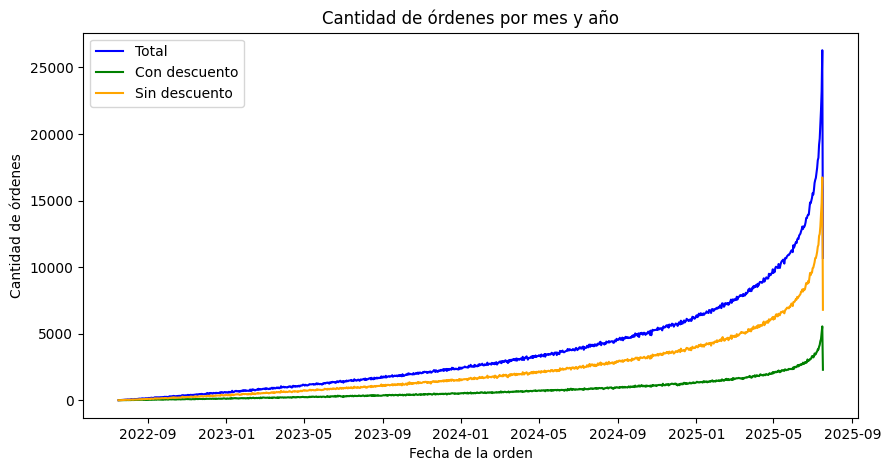

In [5]:
plt.figure(figsize=(10, 5))
plt.title("Cantidad de órdenes por mes y año")
sns.lineplot(
    data=orders["date"].value_counts().reset_index(), 
    x="date", y="count", color="blue", label="Total")
sns.lineplot(
    data=orders.loc[orders["discount_amount"] > 0]["date"].value_counts().reset_index(), 
    x="date", y="count", color="green", label="Con descuento")
sns.lineplot(
    data=orders.loc[orders["discount_amount"] == 0]["date"].value_counts().reset_index(), 
    x="date", y="count", color="orange", label="Sin descuento")
plt.xlabel("Fecha de la orden")
plt.ylabel("Cantidad de órdenes")

C:\Users\Patricio\AppData\Local\Temp\ipykernel_17936\2962429711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_per_state, x="state", y="count", palette="viridis")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62],
 [Text(0, 0, 'N/A'),
  Text(1, 0, 'AE'),
  Text(2, 0, 'AP'),
  Text(3, 0, 'AA'),
  Text(4, 0, 'NH'),
  Text(5, 0, 'PW'),
  Text(6, 0, 'FM'),
  Text(7, 0, 'CO'),
  Text(8, 0, 'KS'),
  Text(9, 0, 'GU'),
  Text(10, 0, 'AK'),
  Text(11, 0, 'NJ'),
  Text(12, 0, 'TX'),
  Text(13, 0, 'OH'),
  Text(14, 0, 'SC'),
  Text(15, 0, 'MN'),
  Text(16, 0, 'MO'),
  Text(17, 0, 'LA'),
  Text(18, 0, 'AR'),
  Text(19, 0, 'AS'),
  Text(20, 0, 'MD'),
  Text(21, 0, 'WA'),
  Text(22, 0, 'NE'),
  Text(23, 0, 'VA'),
  Text(24, 0, 'IL'),
  Text(25, 0, 'SD'),
  Text(26, 0, 'AZ'),
  Text(27, 0, 'VT'),
  Text(28, 0, 'WV'),
  Text(29, 0, 'DE'),
  Text(30,

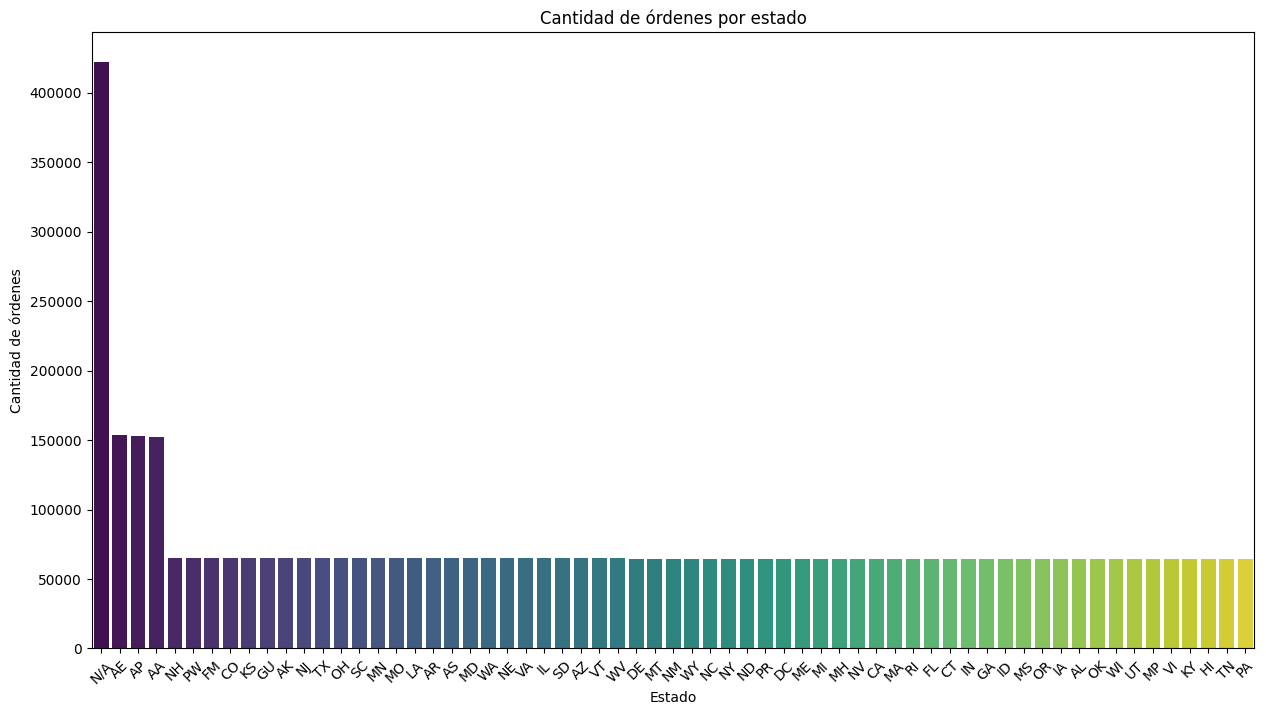

In [6]:
orders_per_state = orders["state"].value_counts().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=orders_per_state, x="state", y="count", palette="viridis")
plt.title("Cantidad de órdenes por estado")
plt.xlabel("Estado")
plt.ylabel("Cantidad de órdenes")
plt.xticks(rotation=45)

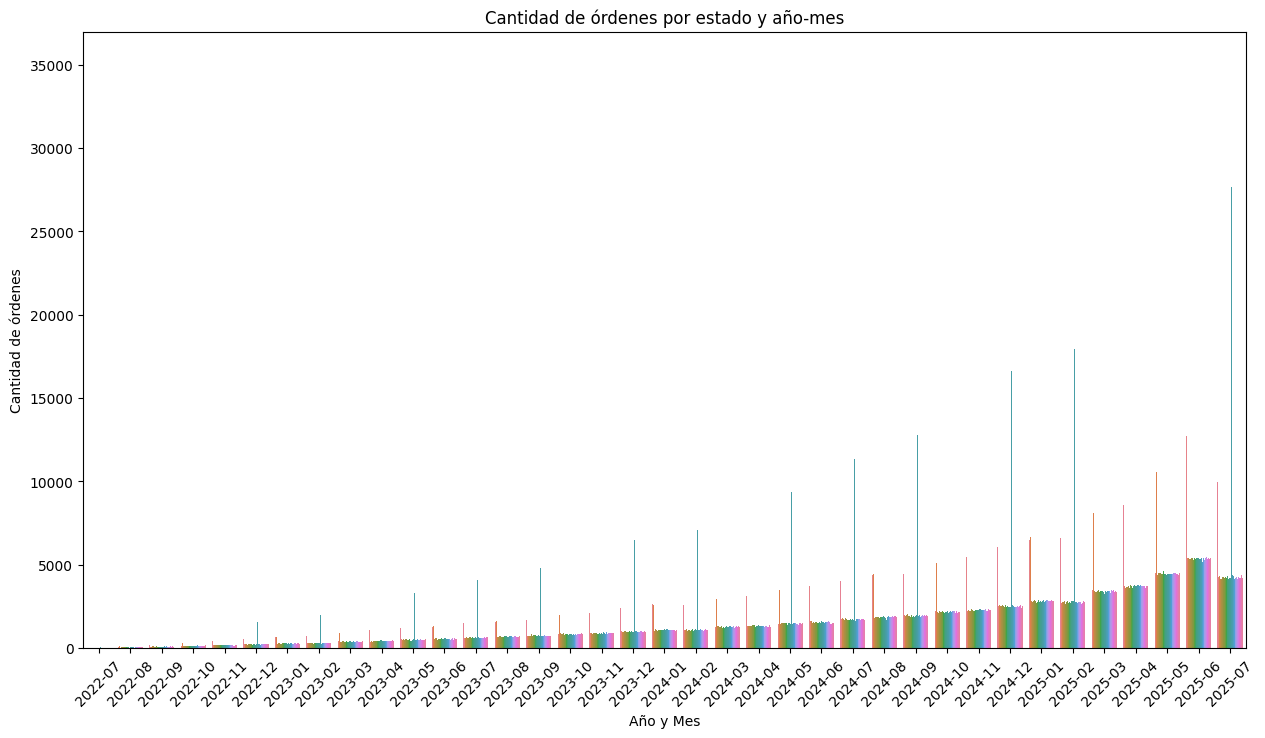

In [7]:
orders_per_state_year_month = orders.groupby(["state","year_month"]).size().reset_index().rename(columns={0: "count"})
plt.figure(figsize=(15, 8))
sns.barplot(data=orders_per_state_year_month, x="year_month", y="count", hue="state")
plt.title("Cantidad de órdenes por estado y año-mes")
plt.xlabel("Año y Mes")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de órdenes")
plt.legend([],[], frameon=False)

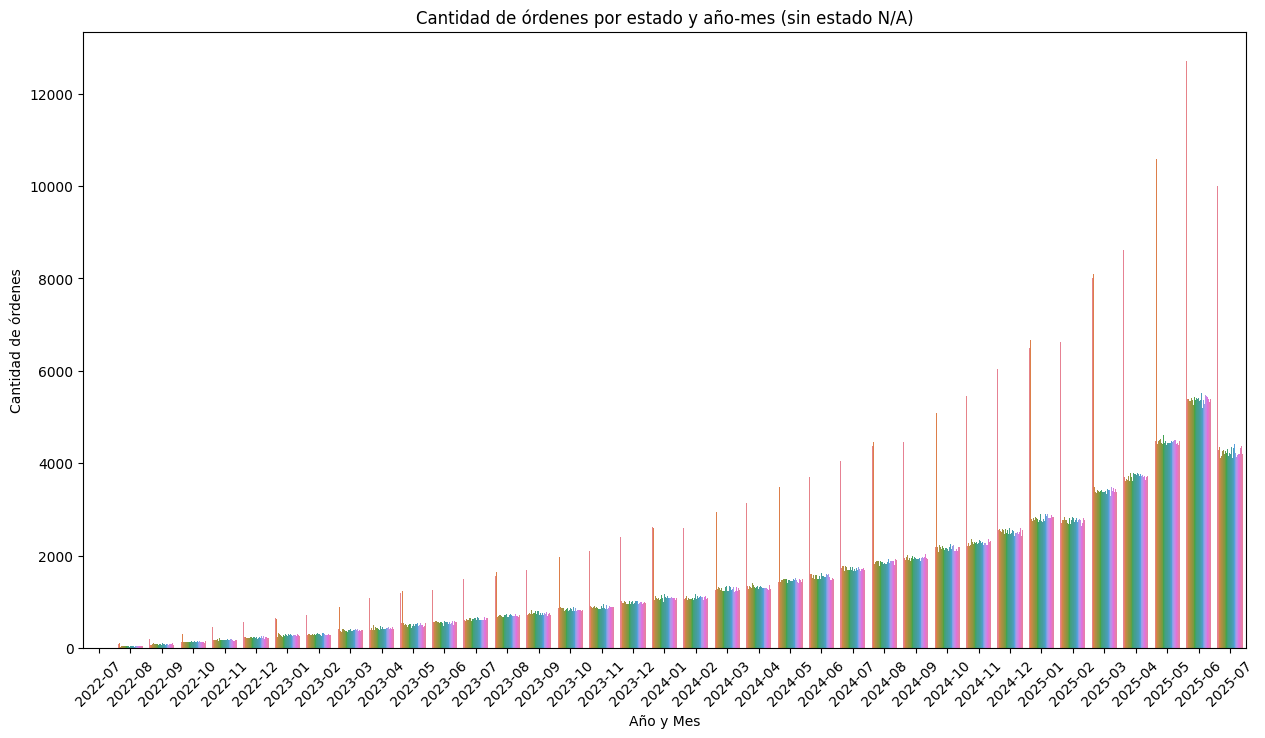

In [8]:
orders_per_state_year_month = orders.groupby(["state","year_month"]).size().reset_index().rename(columns={0: "count"})
plt.figure(figsize=(15, 8))
sns.barplot(data=orders_per_state_year_month.loc[orders_per_state_year_month["state"] != "N/A"], x="year_month", y="count", hue="state")
plt.title("Cantidad de órdenes por estado y año-mes (sin estado N/A)")
plt.xlabel("Año y Mes")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de órdenes")
plt.legend([],[], frameon=False)

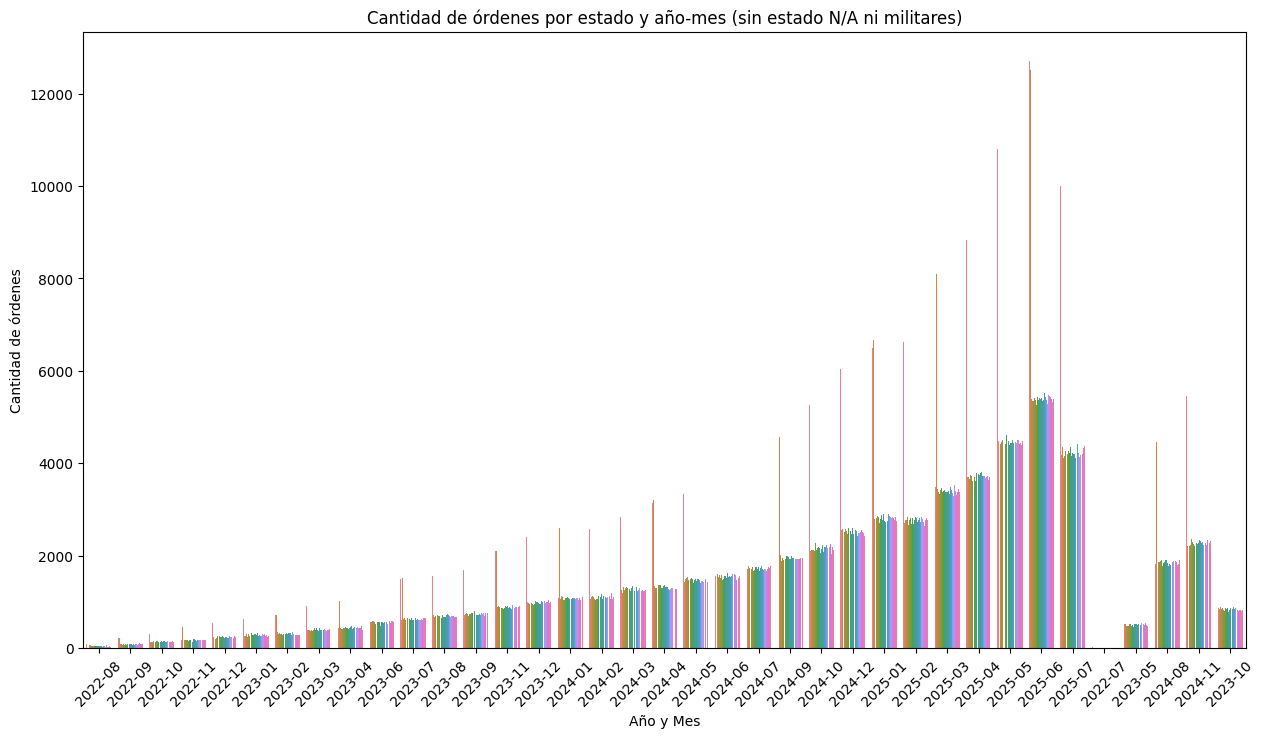

In [9]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=orders_per_state_year_month.loc[~(
        orders["state"].str.contains("AA")   # Military Americas
        | orders["state"].str.contains("AE") # Military Europe
        | orders["state"].str.contains("AP") # Military Pacific
        | orders_per_state_year_month["state"].str.contains("N/A")
    )], 
    x="year_month", y="count", hue="state"
    )
plt.title("Cantidad de órdenes por estado y año-mes (sin estado N/A ni militares)")
plt.xlabel("Año y Mes")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de órdenes")
plt.legend([],[], frameon=False)

# Meses ahora aparecen desordenados en el eje X
# Posiblemente sea porque en esos meses sólo había órdenes de estados que fueron filtrados

#### `orders` y `order_items` no están relacionados

In [ ]:
order_items = pd.read_csv('data/order_items.csv')
print(
    f"Los order_id en orders estan en el rango \
    [{orders['order_id'].min()}, {orders['order_id'].max()}]"
    )
print(
    f"Los order_id en order_items estan en el rango \
    [{order_items['order_id'].min()}, {order_items['order_id'].max()}]"
    )
print(
    "Los rangos son disjuntos, por lo que no hay order_id en común entre ambos datasets."
    )

Los order_id en orders estan en el rango [1, 4700000]
Los order_id en order_items estan en el rango [19900399, 20000000]
Los rangos son disjuntos, por lo que no hay order_id en común entre ambos datasets.
